# Thermodynamic Calculation of Cementite ($Fe_3C$)

#### Bengt Hallstedt, Dejan Djurovic, Jörg von Appen, Richard Dronskowski, Alexey Dick, Fritz Körmann, Tilmann Hickel, Jörg Neugebauer, Thermodynamic properties of cementite, Calphad, Volume 34, Issue 1, March 2010, Pages 129-133, ISSN 0364-5916, http://dx.doi.org/10.1016/j.calphad.2010.01.004. (http://www.sciencedirect.com/science/article/pii/S0364591610000052)

The TDB file used here differs slightly from the published TDB to ensure compatibility with pycalphad's TDB parser. All phases except cementite are omitted. The numerical results should be the same.

In [1]:
TDB = """
 ELEMENT C    GRAPHITE                   12.011     1054.0      5.7423 ! 
 ELEMENT FE   BCC_A2                     55.847     4489.0     27.2797 ! 
 TYPE_DEFINITION % SEQ * !
 TYPE_DEFINITION A GES AMEND_PHASE_DESCRIPTION @ MAGNETIC -3 0.28 !
 PHASE CEMENTITE_D011 %A 2 3 1 !
 CONSTITUENT CEMENTITE_D011 : FE : C : !
 PARAMETER  G(CEMENTITE_D011,FE:C;0) 0.01 +GFECEM; 6000 N !
 PARAMETER  TC(CEMENTITE_D011,FE:C;0) 0.01 485.00; 6000 N !
 PARAMETER  BMAGN(CEMENTITE_D011,FE:C;0) 0.01 1.008; 6000 N !
 FUNCTION GFECEM      0.01  +11369.937746-5.641259263*T-8.333E-6*T**4;
        43.00  Y  +11622.647246-59.537709263*T+15.74232*T*LN(T)
       -0.27565*T**2;
       163.00  Y  -10195.860754+690.949887637*T-118.47637*T*LN(T)
                  -0.0007*T**2+590527*T**(-1);
      6000.00  N !
"""

Do some initial setup, including reading the database.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 9, 6
import numpy as np
from pycalphad import Database, calculate
import pycalphad.variables as v

db = Database(TDB)

Compute the molar heat capacity at all temperatures from 1K to 2000K with a step size of 0.5K.

In [3]:
result = calculate(db, ['FE', 'C'], 'CEMENTITE_D011', T=(1, 2000, 0.5), output='CPM')

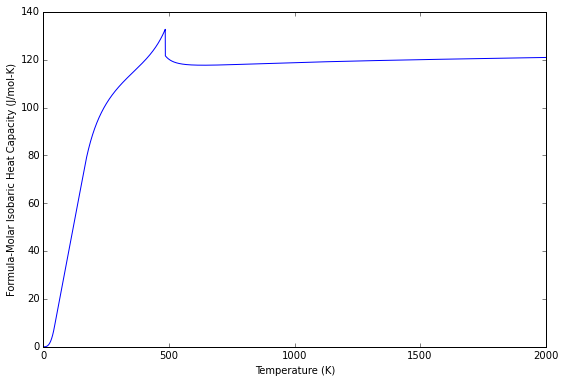

In [4]:
# Note: 4 moles of atoms per formula unit (Fe3C1). That's why we multiply times 4
plt.xlabel('Temperature (K)')
plt.ylabel('Formula-Molar Isobaric Heat Capacity (J/mol-K)')
plt.plot(result['T'], 4.0 * result['CPM'])
plt.show()

In [5]:
result = calculate(db, ['FE', 'C'], 'CEMENTITE_D011', T=(1, 2000, 0.5), output='SM')

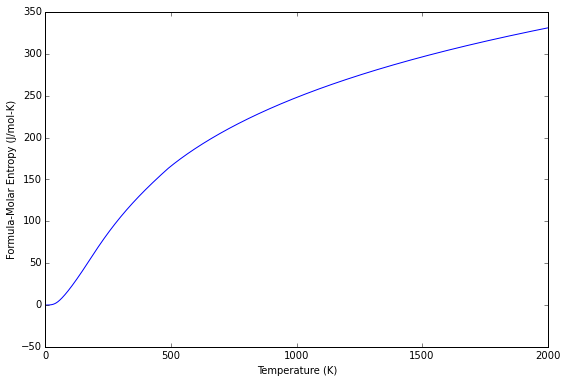

In [6]:
plt.xlabel('Temperature (K)')
plt.ylabel('Formula-Molar Entropy (J/mol-K)')
plt.plot(result['T'], 4.0 * result['SM'])
plt.show()